**Exercise Sheet 1**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from zipfile import ZipFile 

In [ ]:
import pandas as pd
from os import listdir
from os.path import isfile, join

In [ ]:
file_name = "data.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

In [ ]:
folder = "data"
files = os.listdir(folder)
labels = files
image_folder = "images/"

In [ ]:
delimineter = "/"
images = []
os.makedirs(image_folder)
label_list = []
for label in labels:
  file_path = folder+delimineter+label+delimineter
  dirs = os.listdir( file_path )
  for file in dirs:
    shutil.copy(file_path+file, image_folder)
    digit_name = int(''.join(filter(str.isdigit, str(file))))
    os.rename(file_path+file, file_path+str(label)+"_"+str(digit_name)+".png")
    

In [ ]:
a

[]

In [ ]:
fnames = get_image_files(image_folder)
fnames[:5]

[PosixPath('images/mask_2474.png'),
 PosixPath('images/mask_1021.png'),
 PosixPath('images/mask_4027.png'),
 PosixPath('images/mask_917.png'),
 PosixPath('images/mask_526.png')]

In [ ]:
bs = 64

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [ ]:
path_img = "images/"

In [ ]:
fnames = get_image_files("images/")
fnames[:10]

[PosixPath('images/mask_2474.png'),
 PosixPath('images/mask_1021.png'),
 PosixPath('images/mask_4027.png'),
 PosixPath('images/mask_917.png'),
 PosixPath('images/mask_526.png'),
 PosixPath('images/no_mask_184.png'),
 PosixPath('images/mask_918.png'),
 PosixPath('images/mask_3806.png'),
 PosixPath('images/no_mask_2400.png'),
 PosixPath('images/mask_2531.png')]

In [ ]:
data = ImageDataBunch.from_name_re(path_img,fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

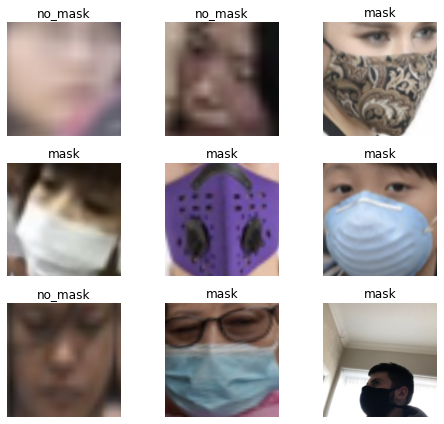

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['incorrect_mask', 'mask', 'no_mask']


(3, 3)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.209148,0.479872,0.130081,00:12
1,0.779072,0.286766,0.078591,00:12
2,0.567197,0.209731,0.073171,00:12
3,0.454275,0.195254,0.065041,00:12


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

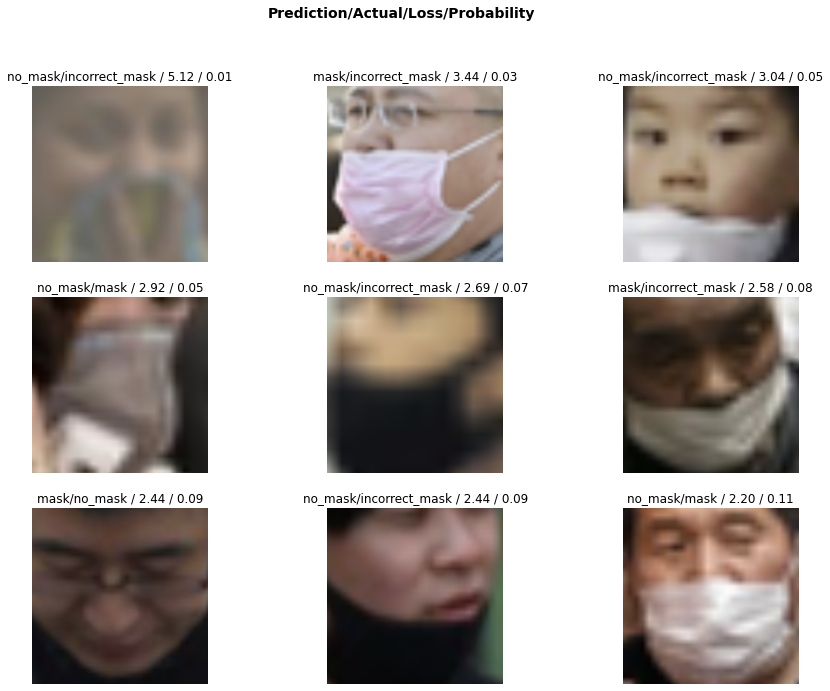

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

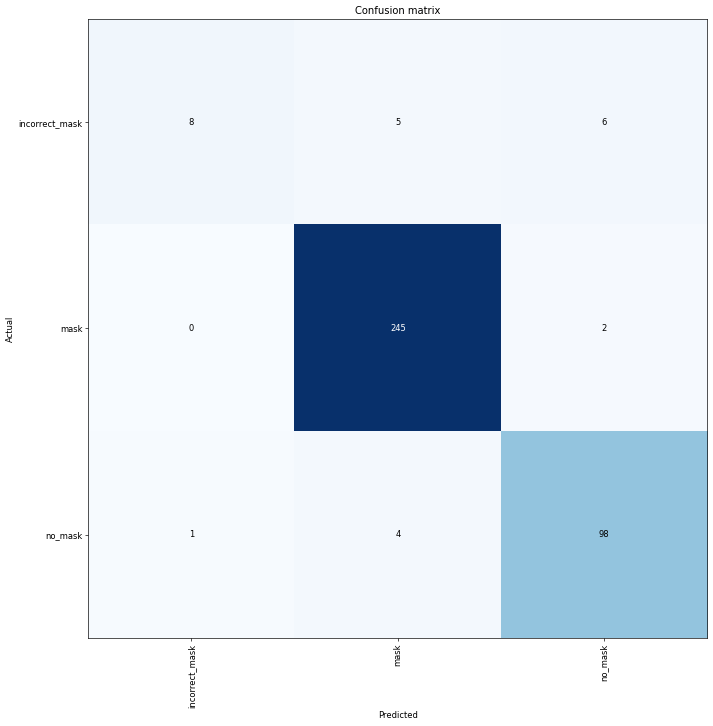

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('incorrect_mask', 'no_mask', 6),
 ('incorrect_mask', 'mask', 5),
 ('no_mask', 'mask', 4),
 ('mask', 'no_mask', 2)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.287291,0.209376,0.051491,00:13


In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


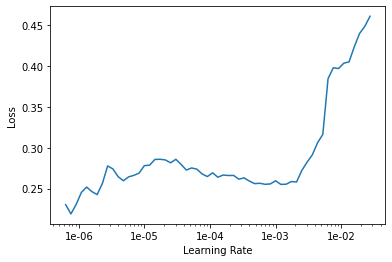

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.281101,0.148865,0.046070,00:13
1,0.217813,0.128679,0.048780,00:13


In [ ]:
learn.load('stage-1');

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.285408,0.215487,0.054201,00:13


**RESNET50**

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


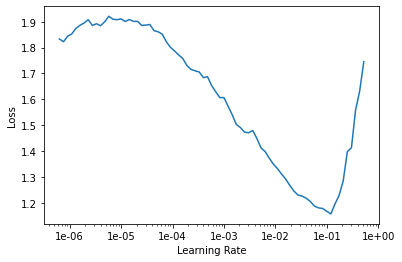

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.946194,0.476176,0.135501,00:25
1,0.638651,0.326979,0.105691,00:24
2,0.445413,0.305936,0.092141,00:24
3,0.354460,0.202224,0.065041,00:25
4,0.291513,0.160962,0.062331,00:24
5,0.236457,0.156858,0.051491,00:24
6,0.218398,0.138429,0.054201,00:24
7,0.176070,0.146381,0.054201,00:24


In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,2.185334,2549.451660,0.292683,00:32
1,1.771762,11.762312,0.135501,00:31
2,1.102893,0.425733,0.108401,00:31


In [ ]:
learn.load('stage-1-50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

[('incorrect_mask', 'no_mask', 6),
 ('incorrect_mask', 'mask', 5),
 ('mask', 'no_mask', 4),
 ('mask', 'incorrect_mask', 3)]

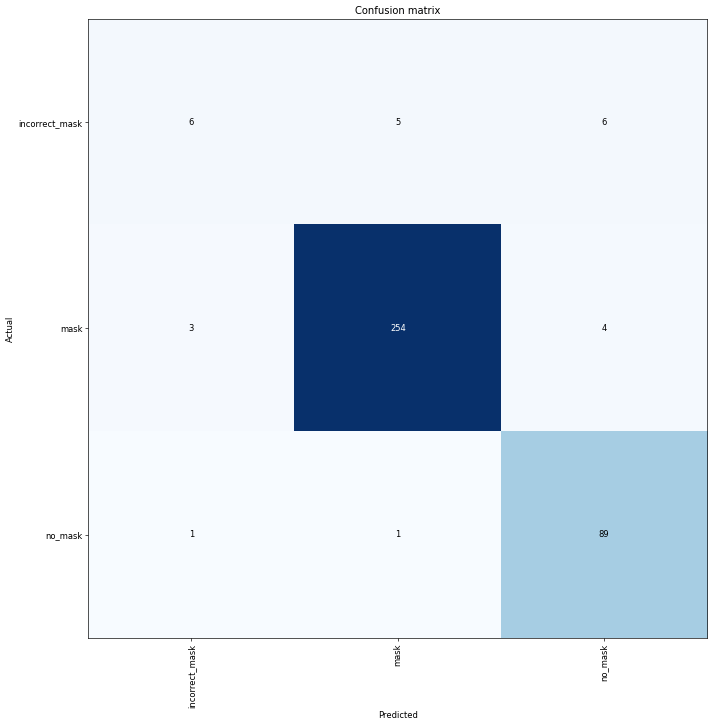

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

**Conclusion**